# Tasks

Machine Learning and Statistics

Winter 2023/24

by Anthony McGarry

***

## Task 1

> Square roots are difficult to calculate. In Python, you typically
use the power operator (a double asterisk) or a package such
as 'math'. In this task, you should write a function 'sqrt(x)' to
approximate the square root of a floating point number x without
using the power operator or a package.

> Rather, you should use the Newton’s method.Start with an 2 Square initial guess for the square root called $z_0$. You then repeatedly
improve it using the following formula, until the difference between some previous guess $z_i$ and the next $z_{i+1}$ is less than some threshold, say 0.01.

$$ z_{i+1} = z_i - \frac{z_i * z_i - x}{2z_i} $$

In [17]:
def newton(x, guess = 2.0, tol = 1e-10):
  while True:
    next_guess = 0.5 * (guess + x / guess)
    if abs(next_guess - guess) < tol:
      return next_guess
    guess = next_guess
    


In [18]:
# The number we want to make this the square root of

x = 36
result = newton(x)

print(f'The square root of {x} is approx {result}')

The square root of 36 is approx 6.0


## Task 2

> Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they prefer plain or chocolate biscuits. Use scipy.stats to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this instance.


|          |          | Biscuit  |          |
|----------|----------|----------|----------|
|              |              | Chocolate    | Plain        |
| Drink        | Coffee       | 43           | 57           |
|              | Tea          | 56           | 45           |






In [19]:
# Import both numpy and chi2_contingency from scipy.stats

import numpy as np
from scipy.stats import chi2_contingency

In [20]:
# Create a 2x2 contingency table
observed = np.array([[43, 57],
                    [56, 45]])

In [21]:
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(observed)

print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

Chi-squared statistic: 2.6359100836554257
p-value: 0.10447218120907394
Degrees of freedom: 1
Expected frequencies:
[[49.25373134 50.74626866]
 [49.74626866 51.25373134]]


Chi Square Test Analysis

- The chi-squared statistic in this case is a numerical measure of the difference between the observed and expected frequencies in the contingency table. It quantifies how much the actual data   deviates from what would be expected under the assumption that there is no association between drink preference and biscuit preference.

- Using a significance level of 0.05. If the p-value is less than 0.05, it can be concluded that there is evidence of an association. If the p-value is greater than 0.05, you would conclude that there is no significant association between these two variables. Based on the results of the above outputs there does not appear to be any association around the preferences of drink and biscuits.



Reference

1. https://www.simplilearn.com/tutorials/statistics-tutorial/chi-square-test

2. https://www.jmp.com/en_be/statistics-knowledge-portal/chi-square-test.html

## Task 3

> Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins.

In [22]:
import seaborn as sns
from scipy import stats

# Load the penguins dataset from seaborn
penguins = sns.load_dataset('penguins')


In [23]:
male_body_mass = penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['sex'] == 'Male'), 'body_mass_g']
female_body_mass = penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['sex'] == 'Female'), 'body_mass_g']

In [24]:
# Using scipy perform the testing
t_statistic, p_value = stats.ttest_ind(male_body_mass, female_body_mass, equal_var=False)

# Print the results of t test and p-value
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 14.761368414543291
P-value: 1.8677596749117468e-28


As the p-value is less than the chosen significance level (0.05), you can reject the null hypothesis and conclude that there is evidence of a significant difference in the body mass of male and female gentoo penguins.

Reference

1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy-stats-ttest-ind
2. https://seaborn.pydata.org/tutorial/function_overview.html
3. https://cs533.ekstrandom.net/f20/resources/tutorials/penguinsamples/

# Task 4

>. Using the famous iris data set,suggest whether the setosa class is easily separable from the other two classes. Provide evidence for your answer.


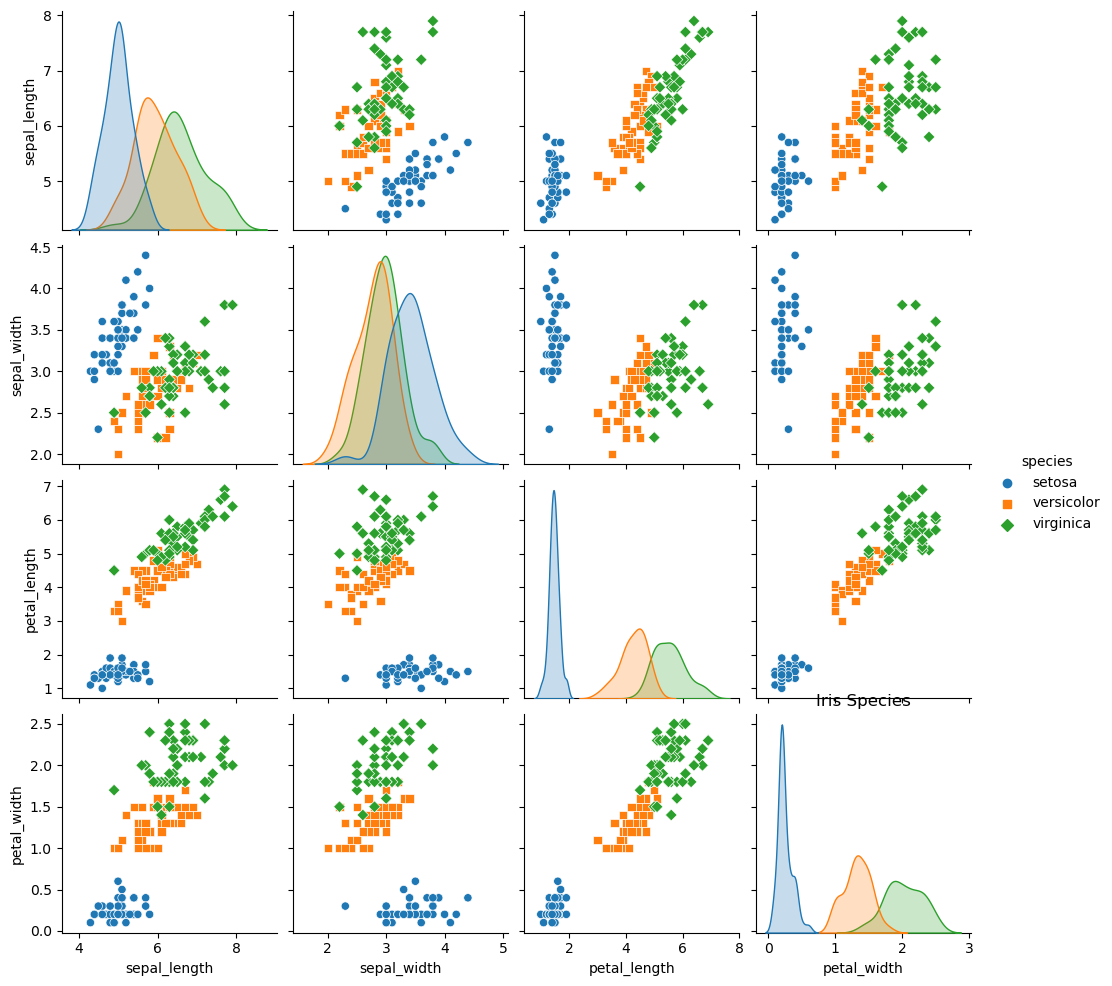

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Pairplot to visualize relationships between different features
sns.pairplot(iris, hue='species', markers=["o", "s", "D"])
plt.title('Iris Species')
plt.show()

In [26]:
# Load Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target
data['species'] = data['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})



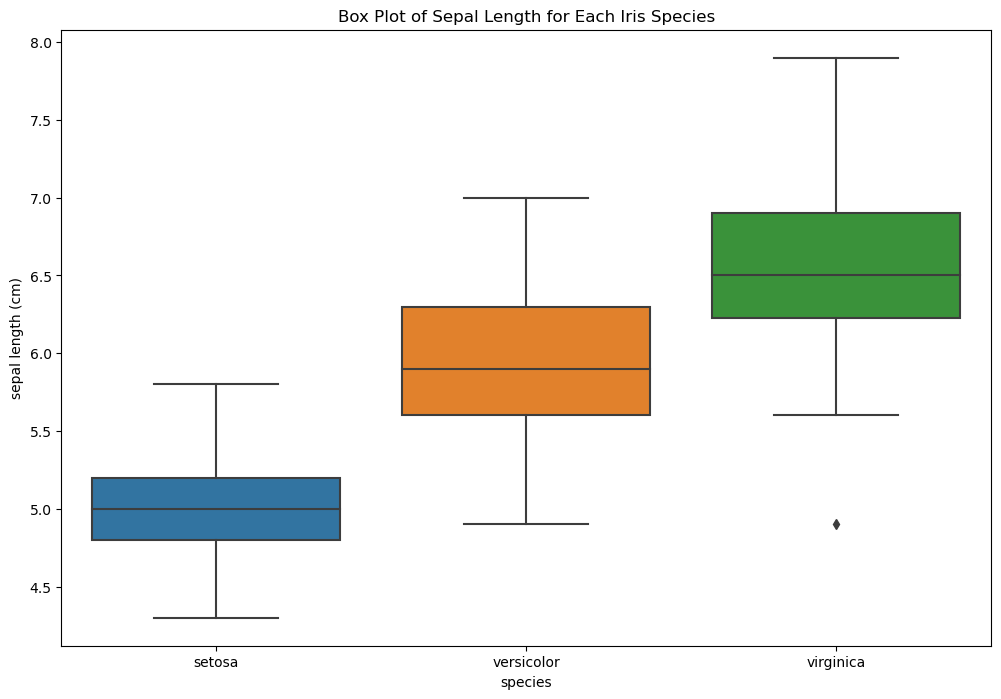

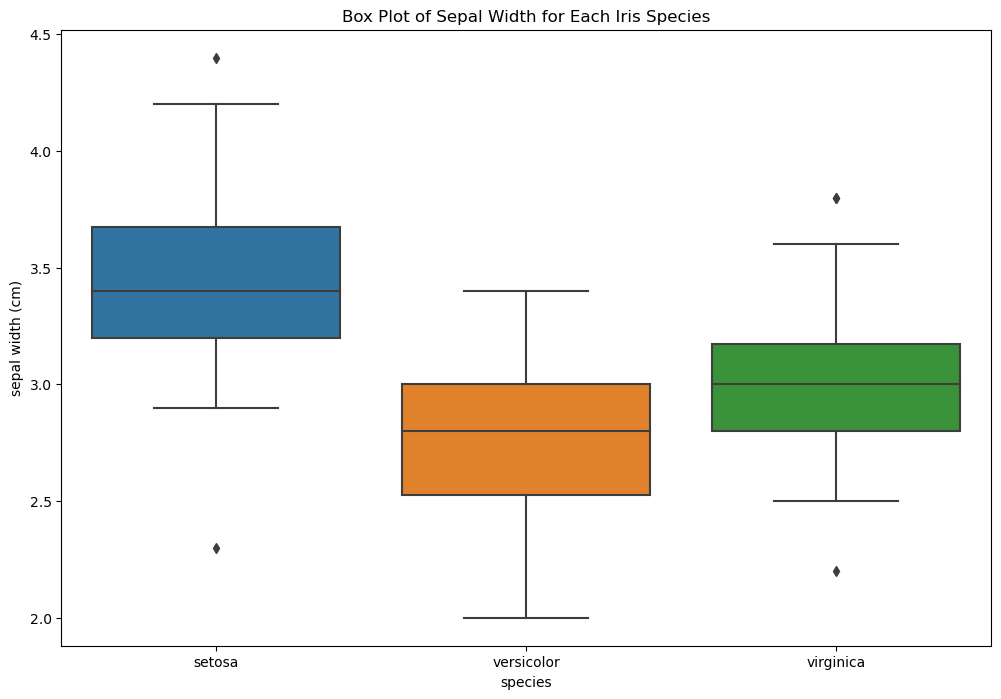

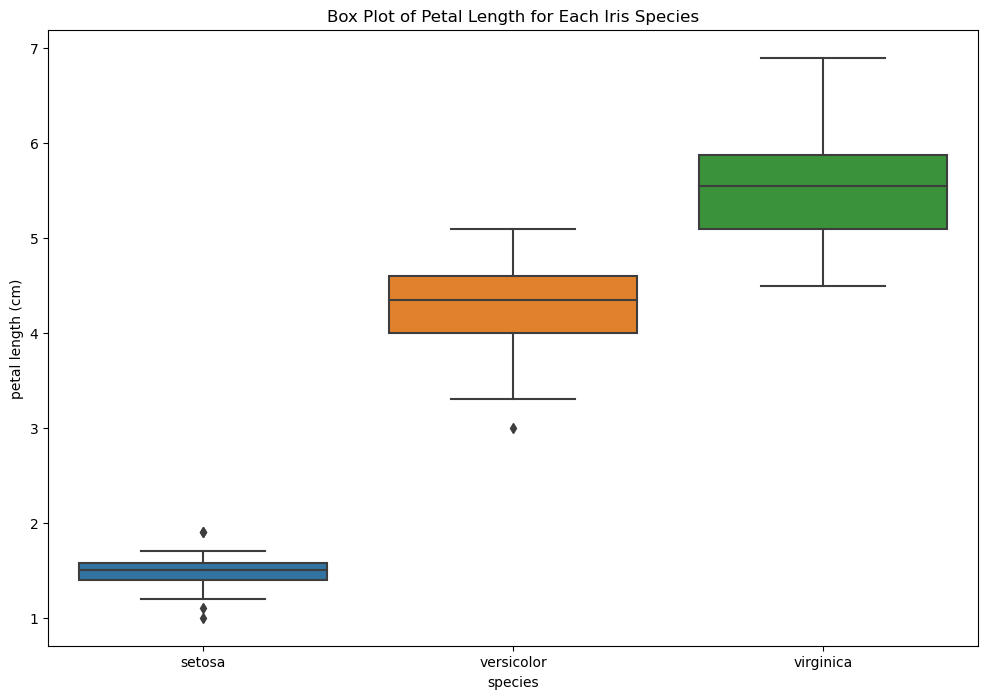

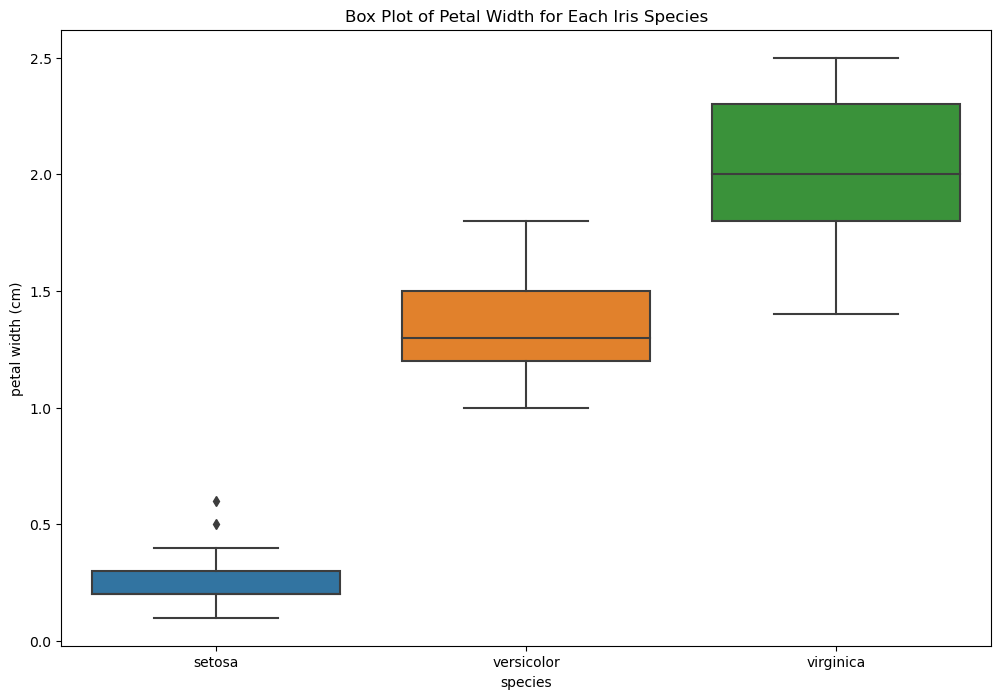

In [27]:
# Create box plots
plt.figure(figsize=(12, 8))
sns.boxplot(x='species', y='sepal length (cm)', data=data)
plt.title('Box Plot of Sepal Length for Each Iris Species')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='species', y='sepal width (cm)', data=data)
plt.title('Box Plot of Sepal Width for Each Iris Species')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='species', y='petal length (cm)', data=data)
plt.title('Box Plot of Petal Length for Each Iris Species')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='species', y='petal width (cm)', data=data)
plt.title('Box Plot of Petal Width for Each Iris Species')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris



In [29]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k) as needed

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

In [31]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 1.00

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

